# <h1><center>WHO - World Health Organization</center></h1>

In this case I used the WHO dataset plus a dataset with median age by country and population by country

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')

## 1. Getting the datasets

### covid dataset

In [2]:
url_covid = 'https://covid19.who.int/WHO-COVID-19-global-data.csv'

covid = pd.read_csv(url_covid)
covid.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-02-24,AF,Afghanistan,EMRO,5,5,0,0
1,2020-02-25,AF,Afghanistan,EMRO,0,5,0,0
2,2020-02-26,AF,Afghanistan,EMRO,0,5,0,0
3,2020-02-27,AF,Afghanistan,EMRO,0,5,0,0
4,2020-02-28,AF,Afghanistan,EMRO,0,5,0,0


### median_age dataset

In [3]:
url_median_age = 'https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/EXCEL_FILES/1_Population/WPP2019_POP_F05_MEDIAN_AGE.xlsx'

median_age = pd.read_excel(url_median_age, header=16)
median_age.head()

,Index,Variant,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,1950,1955,1960,...,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
0,1,Estimates,WORLD,NaN,900,World,0,23.5694,23.106,22.6478,...,21.8691,22.5853,23.3071,24.046,25.1395,26.3357,27.4172,28.4767,29.5918,30.904
1,2,Estimates,UN development groups,a,1803,Label/Separator,900,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,3,Estimates,More developed regions,b,901,Development Group,1803,28.4891,28.9703,29.5268,...,30.9217,31.8945,33.0649,34.3612,35.7717,37.2852,38.6758,39.8549,40.9719,41.9935
3,4,Estimates,Less developed regions,c,902,Development Group,1803,21.4237,20.6506,19.9874,...,19.2806,19.9483,20.8497,21.7603,22.9302,24.1063,25.1627,26.4087,27.7267,29.0419
4,5,Estimates,Least developed countries,d,941,Development Group,902,19.296,19.078,18.7468,...,17.6875,17.5265,17.4498,17.5614,17.8808,18.1846,18.5901,18.9762,19.5242,20.2911


### population density dataset

In [4]:
url_population_density = 'https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/EXCEL_FILES/1_Population/WPP2019_POP_F06_POPULATION_DENSITY.xlsx'

population_density = pd.read_excel(url_population_density, header=16)
population_density.head()

,Index,Variant,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,1950,1951,1952,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,Estimates,WORLD,NaN,900,World,0,19.4969,19.8628,20.2228,...,54.1239,54.7744,55.4259,56.0771,56.7266,57.3741,58.0185,58.6583,59.2915,59.9167
1,2,Estimates,UN development groups,a,1803,Label/Separator,900,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,3,Estimates,More developed regions,b,901,Development Group,1803,16.5962,16.7833,16.9812,...,25.2473,25.3401,25.4284,25.5132,25.5948,25.6734,25.7481,25.8176,25.8801,25.9346
3,4,Estimates,Less developed regions,c,902,Development Group,1803,21.2552,21.7295,22.1877,...,71.6275,72.6162,73.609,74.6034,75.5973,76.5895,77.5793,78.5647,79.5439,80.515
4,5,Estimates,Least developed countries,d,941,Development Group,902,9.70429,9.89063,10.0811,...,42.5295,43.5423,44.5814,45.6455,46.7334,47.8452,48.9806,50.1379,51.3146,52.5088


### population
to calculate number of infected people per 1M inhabitants

In [5]:
url_population = 'https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/EXCEL_FILES/1_Population/WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx'

population = pd.read_excel(url_population, header=16)
population.tail()

,Index,Variant,"Region, subregion, country or area *",Notes,Country code,Type,Parent code,1950,1951,1952,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
284,285,Estimates,Bermuda,14,60,Country/Area,918,37.256,37.8,38.437,...,65.076,64.737,64.381,64.038,63.695,63.36,63.04,62.763,62.508,62.273
285,286,Estimates,Canada,NaN,124,Country/Area,918,13733.4,14078.4,14445.5,...,34539.2,34922,35296.5,35664.3,36026.7,36382.9,36732.1,37074.6,37411,37742.2
286,287,Estimates,Greenland,26,304,Country/Area,918,22.993,23.466,23.936,...,56.555,56.477,56.412,56.383,56.378,56.408,56.473,56.565,56.66,56.772
287,288,Estimates,Saint Pierre and Miquelon,2,666,Country/Area,918,4.567,4.609,4.648,...,6.323,6.251,6.168,6.073,5.992,5.933,5.885,5.845,5.821,5.795
288,289,Estimates,United States of America,35,840,Country/Area,918,158804,160872,163266,...,311584,314044,316401,318673,320878,323016,325085,327096,329065,331003


## 2. Cleaning the datasets

In [6]:
def clean_column_names(df: pd.DataFrame):
    df.columns = df.columns \
                   .str.lower() \
                   .str.lstrip() \
                   .str.replace('*', '') \
                   .str.rstrip() \
                   .str.replace(' ', '_') \
                   .str.replace(',', '')

### covid dataset

In [7]:
clean_column_names(covid)

In [8]:
covid.head()

,date_reported,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
0,2020-02-24,AF,Afghanistan,EMRO,5,5,0,0
1,2020-02-25,AF,Afghanistan,EMRO,0,5,0,0
2,2020-02-26,AF,Afghanistan,EMRO,0,5,0,0
3,2020-02-27,AF,Afghanistan,EMRO,0,5,0,0
4,2020-02-28,AF,Afghanistan,EMRO,0,5,0,0


### median_age dataset

In [9]:
clean_column_names(median_age)

In [10]:
median_age.tail()

,index,variant,region_subregion_country_or_area,notes,country_code,type,parent_code,1950,1955,1960,...,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
250,251,Estimates,Netherlands,28,528,Country/Area,926,28.019,28.482,28.602,...,29.393,31.275,33.107,34.564,36.008,37.526,39.046,40.797,42.07,43.314
251,252,Estimates,Switzerland,NaN,756,Country/Area,926,33.174,32.967,32.717,...,32.882,34.646,36.01,36.88,37.22,38.555,40.042,41.55,42.21,43.053
252,253,Estimates,NORTHERN AMERICA,NaN,918,SDG subregion,1829,29.9811,30.0679,29.4187,...,28.8269,29.9297,31.4033,32.8513,34.1232,35.3571,36.3528,37.1585,37.8661,38.6078
253,254,Estimates,Canada,NaN,124,Country/Area,918,27.701,27.324,26.458,...,27.457,29.193,31.045,32.924,34.777,36.794,38.559,39.619,40.401,41.124
254,255,Estimates,United States of America,29,840,Country/Area,918,30.193,30.324,29.738,...,28.985,30.014,31.444,32.845,34.048,35.188,36.104,36.875,37.565,38.308


In [11]:
median_age_2020 = median_age[median_age.type == 'Country/Area'] \
                    [['region_subregion_country_or_area', '2020']] \
                    .rename(columns={'region_subregion_country_or_area': 'country_area'}) \
                    .reset_index(drop=True)
                                    

median_age_2020.head()

,country_area,2020
0,Burundi,17.32
1,Comoros,20.37
2,Djibouti,26.57
3,Eritrea,19.209
4,Ethiopia,19.466


### population density

In [12]:
clean_column_names(population_density)

In [13]:
population_density.tail()

,index,variant,region_subregion_country_or_area,notes,country_code,type,parent_code,1950,1951,1952,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
284,285,Estimates,Bermuda,14,60,Country/Area,918,745.12,756,768.74,...,1301.52,1294.74,1287.62,1280.76,1273.9,1267.2,1260.8,1255.26,1250.16,1245.46
285,286,Estimates,Canada,NaN,124,Country/Area,918,1.51024,1.54819,1.58855,...,3.79822,3.84032,3.88151,3.92196,3.9618,4.00098,4.03937,4.07703,4.11404,4.15045
286,287,Estimates,Greenland,26,304,Country/Area,918,0.056019,0.0571714,0.0583165,...,0.137788,0.137598,0.137439,0.137369,0.137357,0.13743,0.137588,0.137812,0.138044,0.138316
287,288,Estimates,Saint Pierre and Miquelon,2,666,Country/Area,918,19.8565,20.0391,20.2087,...,27.4913,27.1783,26.8174,26.4043,26.0522,25.7957,25.587,25.413,25.3087,25.1957
288,289,Estimates,United States of America,35,840,Country/Area,918,17.3606,17.5866,17.8483,...,34.0625,34.3314,34.589,34.8375,35.0786,35.3123,35.5384,35.7583,35.9735,36.1854


In [14]:
population_density_2020 = \
            population_density[population_density.type == 'Country/Area'] \
                    [['region_subregion_country_or_area', '2020']] \
                    .rename(columns={'region_subregion_country_or_area': 'country_area'}) \
                    .reset_index(drop=True)

In [15]:
population_density_2020.head()

,country_area,2020
0,Burundi,463.037
1,Comoros,467.273
2,Djibouti,42.623
3,Eritrea,35.1131
4,Ethiopia,114.964


### population

In [16]:
clean_column_names(population)

In [17]:
population.tail()

,index,variant,region_subregion_country_or_area,notes,country_code,type,parent_code,1950,1951,1952,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
284,285,Estimates,Bermuda,14,60,Country/Area,918,37.256,37.8,38.437,...,65.076,64.737,64.381,64.038,63.695,63.36,63.04,62.763,62.508,62.273
285,286,Estimates,Canada,NaN,124,Country/Area,918,13733.4,14078.4,14445.5,...,34539.2,34922,35296.5,35664.3,36026.7,36382.9,36732.1,37074.6,37411,37742.2
286,287,Estimates,Greenland,26,304,Country/Area,918,22.993,23.466,23.936,...,56.555,56.477,56.412,56.383,56.378,56.408,56.473,56.565,56.66,56.772
287,288,Estimates,Saint Pierre and Miquelon,2,666,Country/Area,918,4.567,4.609,4.648,...,6.323,6.251,6.168,6.073,5.992,5.933,5.885,5.845,5.821,5.795
288,289,Estimates,United States of America,35,840,Country/Area,918,158804,160872,163266,...,311584,314044,316401,318673,320878,323016,325085,327096,329065,331003


In [18]:
population_2020 = population[population.type == 'Country/Area'] \
                    [['region_subregion_country_or_area', '2020']] \
                    .rename(columns={'region_subregion_country_or_area': 'country_area'}) \
                    .reset_index(drop=True)

In [19]:
population_2020.head()

,country_area,2020
0,Burundi,11890.8
1,Comoros,869.595
2,Djibouti,988.002
3,Eritrea,3546.43
4,Ethiopia,114964


In [20]:
population_2020[population_2020.country_area == 'Ethiopia']

,country_area,2020
4,Ethiopia,114964


In [21]:
# removing the points that causes a wrong interpretation of the actual number
population_2020['2020'] = population_2020['2020'].astype(str) \
                                .apply(lambda x: x.replace('.', '')) \
                                .astype(int)

In [22]:
population_2020.head()

,country_area,2020
0,Burundi,11890781
1,Comoros,869595
2,Djibouti,988002
3,Eritrea,3546427
4,Ethiopia,114963583


## 3. First Exploratory data analysis

Seeing the countries of each dataframe -> it'll be the key in the merge step.

In [23]:
covid['country'].nunique()

216

In [24]:
population_density_2020['country_area'].nunique()

235

In [25]:
median_age_2020['country_area'].nunique()

201

In [26]:
population_2020['country_area'].nunique()

235

### covid dataset

In [27]:
covid.shape

(31985, 8)

In [28]:
covid.describe()

,new_cases,cumulative_cases,new_deaths,cumulative_deaths
count,31985.000000,3.198500e+04,31985.000000,31985.000000
mean,542.590308,2.750032e+04,21.081476,1422.345474
std,3306.080508,1.651532e+05,127.359363,7985.056783
min,-3525.000000,1.000000e+00,-514.000000,0.000000
25%,0.000000,4.800000e+01,0.000000,0.000000
50%,7.000000,6.290000e+02,0.000000,11.000000
75%,113.000000,5.923000e+03,2.000000,116.000000
max,74354.000000,4.456389e+06,6409.000000,151265.000000


In [29]:
covid[(covid['new_cases'] < 0) | (covid['new_deaths'] < 0)].count()['date_reported']

107

There are 107 observations where **new_cases** or **new_deaths** have a negative number. <br>
*How are we going to handle with this?*

In [30]:
covid.iloc[8387:8393]

,date_reported,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
8387,2020-03-10,EC,Ecuador,AMRO,0,19,0,0
8388,2020-03-11,EC,Ecuador,AMRO,0,19,0,0
8389,2020-03-12,EC,Ecuador,AMRO,2,21,0,0
8390,2020-03-13,EC,Ecuador,AMRO,6,27,0,0
8391,2020-03-14,EC,Ecuador,AMRO,0,27,0,0
8392,2020-03-15,EC,Ecuador,AMRO,0,27,0,0


In [31]:
covid[4638:4641]

,date_reported,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
4638,2020-06-11,BF,Burkina Faso,AFRO,0,891,0,53
4639,2020-06-12,BF,Burkina Faso,AFRO,0,891,0,53
4640,2020-06-13,BF,Burkina Faso,AFRO,1,892,0,53


In [32]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31985 entries, 0 to 31984
Data columns (total 8 columns):
date_reported        31985 non-null object
country_code         31845 non-null object
country              31985 non-null object
who_region           31985 non-null object
new_cases            31985 non-null int64
cumulative_cases     31985 non-null int64
new_deaths           31985 non-null int64
cumulative_deaths    31985 non-null int64
dtypes: int64(4), object(4)
memory usage: 2.0+ MB


Here we can see some missing values in **country_code**. <br>
convert **date_reported** to datetime.

In [33]:
covid['date_reported'] = pd.to_datetime(covid['date_reported'])

In [34]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31985 entries, 0 to 31984
Data columns (total 8 columns):
date_reported        31985 non-null datetime64[ns]
country_code         31845 non-null object
country              31985 non-null object
who_region           31985 non-null object
new_cases            31985 non-null int64
cumulative_cases     31985 non-null int64
new_deaths           31985 non-null int64
cumulative_deaths    31985 non-null int64
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 2.0+ MB


In [35]:
covid.isnull().sum()

date_reported          0
country_code         140
country                0
who_region             0
new_cases              0
cumulative_cases       0
new_deaths             0
cumulative_deaths      0
dtype: int64

139 missing values in **country_code**. <br>
It's not a big problem.

In [36]:
covid['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', 'Côte d’Ivoire', 'Croatia',
       'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Es

In [37]:
covid['country'].nunique()

216

In [38]:
covid['country_code'].nunique()

215

In [39]:
covid['country_code'].unique()

array(['AF', 'AL', 'DZ', 'AD', 'AO', 'AI', 'AG', 'AR', 'AM', 'AW', 'AU',
       'AT', 'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ', 'BM',
       'BT', 'BO', 'BQ', 'BA', 'BW', 'BR', 'VG', 'BN', 'BG', 'BF', 'BI',
       'CV', 'KH', 'CM', 'CA', 'KY', 'CF', 'TD', 'CL', 'CN', 'CO', 'KM',
       'CG', 'CR', 'CI', 'HR', 'CU', 'CW', 'CY', 'CZ', 'CD', 'DK', 'DJ',
       'DM', 'DO', 'EC', 'EG', 'SV', 'GQ', 'ER', 'EE', 'SZ', 'ET', 'FK',
       'FO', 'FJ', 'FI', 'FR', 'GF', 'PF', 'GA', 'GM', 'GE', 'DE', 'GH',
       'GI', 'GR', 'GL', 'GD', 'GP', 'GU', 'GT', 'GG', 'GN', 'GW', 'GY',
       'HT', 'VA', 'HN', 'HU', 'IS', 'IN', 'ID', 'IR', 'IQ', 'IE', 'IM',
       'IL', 'IT', 'JM', 'JP', 'JE', 'JO', 'KZ', 'KE', 'XK', 'KW', 'KG',
       'LA', 'LV', 'LB', 'LS', 'LR', 'LY', 'LI', 'LT', 'LU', 'MG', 'MW',
       'MY', 'MV', 'ML', 'MT', 'MQ', 'MR', 'MU', 'YT', 'MX', 'MC', 'MN',
       'ME', 'MS', 'MA', 'MZ', 'MM', nan, 'NP', 'NL', 'NC', 'NZ', 'NI',
       'NE', 'NG', 'MK', 'MP', 'NO', 'PS', 'OM', ' '

There is a empty country code.

In [40]:
covid[covid.country == ' ']

,date_reported,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths


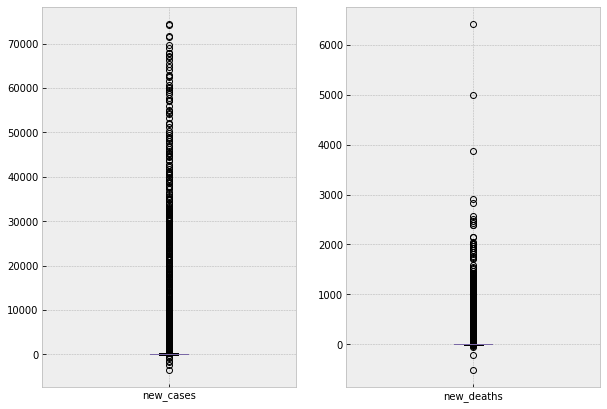

In [41]:
covid[['new_cases', 'new_deaths']].plot(kind='box', subplots=True, 
            grid=True, figsize=(10,7))
plt.show()

In [42]:
covid[covid.new_deaths >= 5000]

,date_reported,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
30742,2020-04-17,US,United States of America,AMRO,28711,632781,6409,32280
30758,2020-05-03,US,United States of America,AMRO,26753,1093880,5000,67637


Is it real?

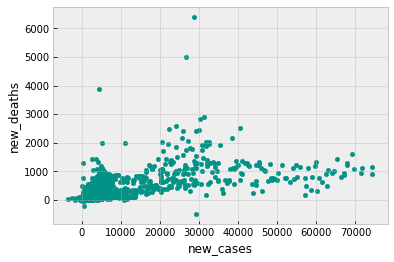

In [43]:
covid.plot(kind='scatter', x='new_cases', 
           y='new_deaths', color='xkcd:teal')
plt.show()

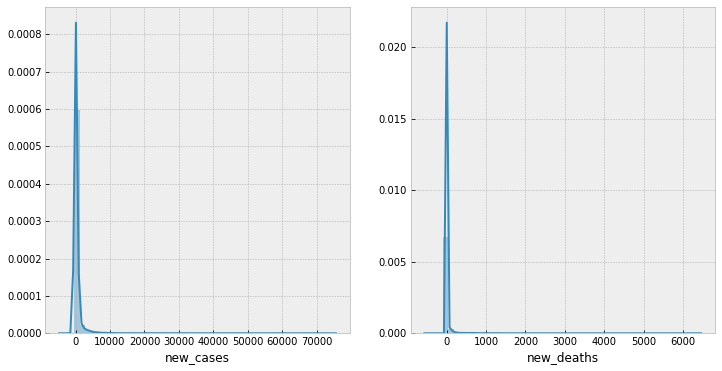

In [44]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.distplot(covid['new_cases'], ax=ax[0])
sns.distplot(covid['new_deaths'], ax=ax[1])
plt.show()

In [45]:
covid_groupby_country = covid.groupby('country')[['new_cases', 'new_deaths']].sum()

covid_head_countries_cases = covid_groupby_country.sort_values('new_cases', ascending=False).head()
covid_head_countries_cases

,new_cases,new_deaths
country,,
United States of America,4456389,151265
Brazil,2610102,91263
India,1695988,36511
Russian Federation,839981,13963
South Africa,482169,7812


United States of America


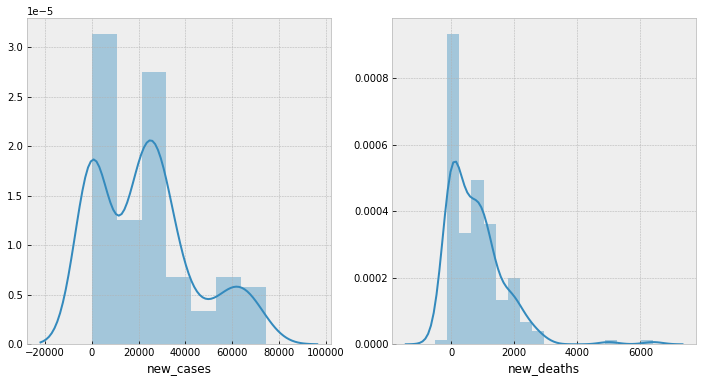

Brazil


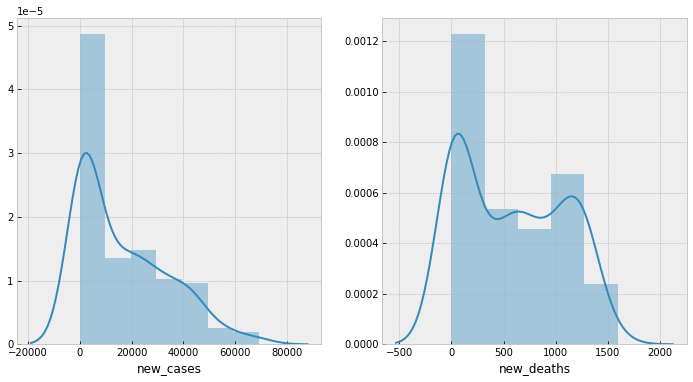

India


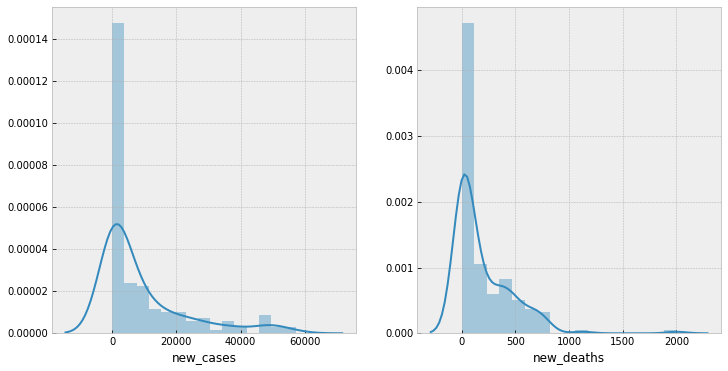

Russian Federation


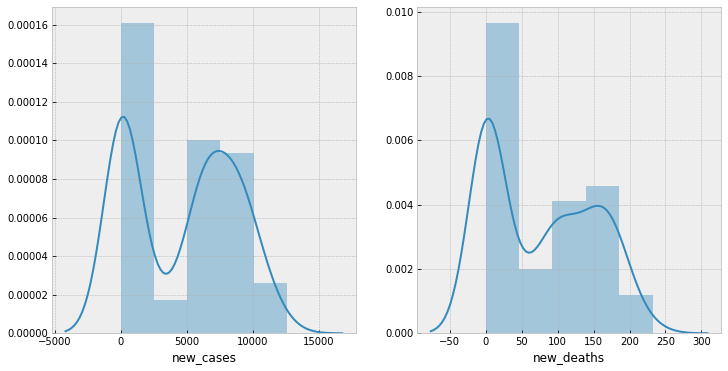

South Africa


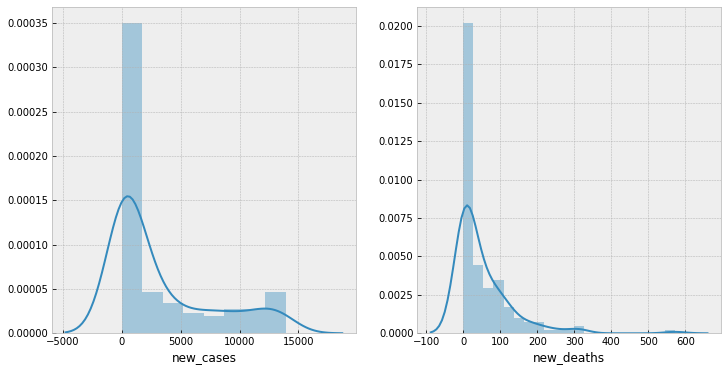

In [46]:
countries = covid_head_countries_cases.index.values

for country in countries:
    print(country)
    
    country_df = covid[covid['country'] == country]
    
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    sns.distplot(country_df['new_cases'], ax=ax[0])
    sns.distplot(country_df['new_deaths'], ax=ax[1])
    plt.show()

### median_age_country_area_2020

In [47]:
median_age_2020.describe()

,country_area,2020
count,201,201.00
unique,201,200.00
top,Paraguay,27.93
freq,1,2.00


In [48]:
median_age_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 2 columns):
country_area    201 non-null object
2020            201 non-null object
dtypes: object(2)
memory usage: 3.2+ KB


In [49]:
median_age_2020.isnull().sum()

country_area    0
2020            0
dtype: int64

### population_density_country_area_2020

In [50]:
population_density_2020.describe()

,country_area,2020
count,235,235.000000
unique,235,235.000000
top,Paraguay,56.491786
freq,1,1.000000


In [51]:
population_density_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 2 columns):
country_area    235 non-null object
2020            235 non-null object
dtypes: object(2)
memory usage: 3.8+ KB


### population_country_area_2020

In [52]:
population_2020.describe()

,2020
count,2.350000e+02
mean,3.142675e+07
std,1.350617e+08
min,1.350000e+02
25%,2.831975e+05
50%,4.033963e+06
75%,1.858033e+07
max,1.439324e+09


In [53]:
population_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 2 columns):
country_area    235 non-null object
2020            235 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.8+ KB


### plots: distplot, hist, box

- median_age_country_area_2020
- population_density_country_area_2020
- population_country_area_2020

median_age_2020


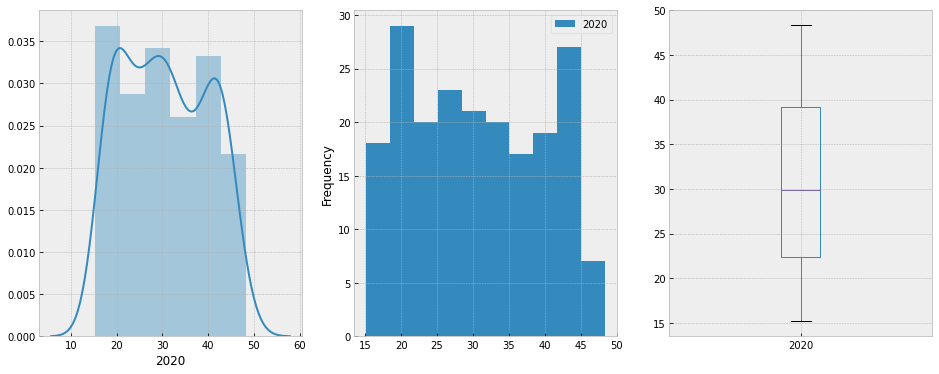

population_density_2020


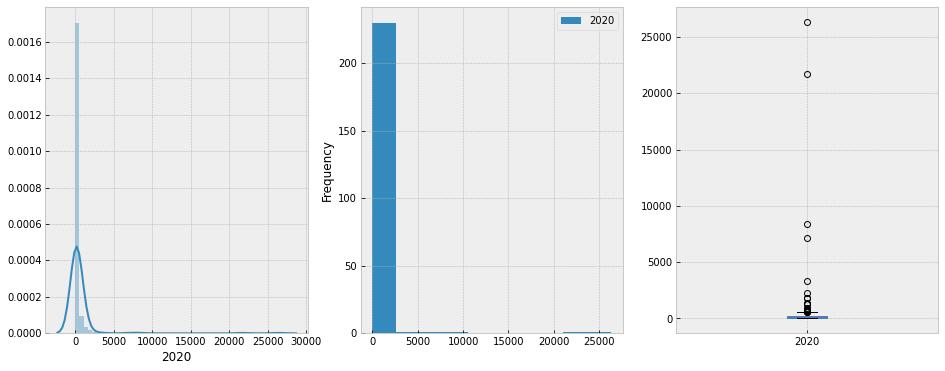

population_2020


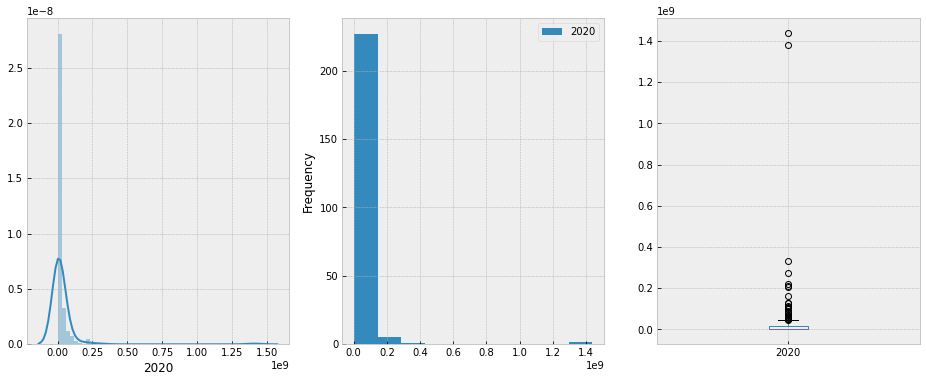

In [54]:
median_age_2020.name = 'median_age_2020'
population_density_2020.name = 'population_density_2020'
population_2020.name = 'population_2020'

dfs = (median_age_2020, 
       population_density_2020,
       population_2020)

for df in dfs:
    print(df.name)
      
    fig, ax = plt.subplots(1,3, figsize=(16,6))
    
    sns.distplot(df['2020'], ax=ax[0])
    df.plot(kind='hist', ax=ax[1])
    df[['2020']].plot(kind='box', subplots=True, grid=True, ax=ax[2])

    plt.show()

## Merging datasets and Feature Engineering

### first: checking the differences in dataset country names

conclusion: I need a better dataset of median_age. This one has just 201 countries. Covid dataset has 216 countries.

In [55]:
pd.concat([population_density_2020['country_area'], 
           population_2020['country_area']]) \
  .drop_duplicates(keep=False)

Series([], Name: country_area, dtype: object)

there is no difference between population and population_density

In [56]:
covid_countries = pd.DataFrame(covid['country'].unique())

pd.concat([covid_countries[0],
           population_2020['country_area']]) \
  .drop_duplicates(keep=False).count()

39

In [57]:
# correcting some country values
covid = covid.replace('Côte d’Ivoire', "Côte d'Ivoire")
covid = covid.replace('The United Kingdom', 'United Kingdom')
covid = covid.replace('Northern Mariana Islands (Commonwealth of the)', 'Northern Mariana Islands')

population_2020 = population_2020.replace('Saint Martin (French part)', 'Saint Martin')
population_2020 = population_2020.replace('Sint Maarten (Dutch part)', 'Sint Maarten')

population_density_2020 = population_density_2020.replace('Saint Martin (French part)', 'Saint Martin')
population_density_2020 = population_density_2020.replace('Sint Maarten (Dutch part)', 'Sint Maarten')

In [58]:
covid_countries = pd.DataFrame(covid['country'].unique())

pd.concat([covid_countries[0],
           median_age_2020['country_area']]) \
  .drop_duplicates(keep=False).count()

43

There are a lot of countries missing in median_age_2020. It has just 201 observations.

### Feature Engineering : infected per 1M thousand inhabitants

In [59]:
covid_total_country = covid.groupby('country')[['new_cases', 'new_deaths']].sum()
covid_last_update = covid.groupby('country')[['date_reported']].max()

covid_last_total_country = covid_last_update.join(covid_total_country).reset_index()
covid_last_total_country.head()

,country,date_reported,new_cases,new_deaths
0,Afghanistan,2020-08-01,36710,1283
1,Albania,2020-07-31,5197,154
2,Algeria,2020-07-31,29831,1200
3,Andorra,2020-07-31,922,52
4,Angola,2020-07-31,1109,51


In [60]:
covid_total_cd_population = covid_last_total_country \
                                .merge(population_2020, 
                                       left_on='country', 
                                       right_on='country_area') \
                                .drop('country_area', axis=1)

covid_total_cd_population.head()

,country,date_reported,new_cases,new_deaths,2020
0,Afghanistan,2020-08-01,36710,1283,38928341
1,Albania,2020-07-31,5197,154,28778
2,Algeria,2020-07-31,29831,1200,43851043
3,Andorra,2020-07-31,922,52,77265
4,Angola,2020-07-31,1109,51,32866268


In [61]:
covid_total_cd_population = \
        covid_total_cd_population.assign(
            cases_per_1m_people=
                lambda row: round(row['new_cases']*1000000/row['2020'], 2),
            deaths_per_1m_people=
                lambda row: round(row['new_deaths']*1000000/row['2020'], 2)
        )

In [62]:
covid_total_cd_population.head()

,country,date_reported,new_cases,new_deaths,2020,cases_per_1m_people,deaths_per_1m_people
0,Afghanistan,2020-08-01,36710,1283,38928341,943.01,32.96
1,Albania,2020-07-31,5197,154,28778,180589.34,5351.31
2,Algeria,2020-07-31,29831,1200,43851043,680.28,27.37
3,Andorra,2020-07-31,922,52,77265,11932.96,673.01
4,Angola,2020-07-31,1109,51,32866268,33.74,1.55


### Merging the datasets

In [63]:
covid_median_age = covid.merge(median_age_2020, 
                               left_on='country', 
                               right_on='country_area') \
                        .drop('country_area', axis=1) \
                        .rename(columns={'2020': 'median_age_2020'})

print(covid['country'].nunique())
print(median_age_2020['country_area'].nunique())
print(covid_median_age['country'].nunique())
covid_median_age.head(2)

216
201
187


,date_reported,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths,median_age_2020
0,2020-02-24,AF,Afghanistan,EMRO,5,5,0,0,18.438
1,2020-02-25,AF,Afghanistan,EMRO,0,5,0,0,18.438


In [64]:
covid_median_age_pop_density = covid_median_age.merge(population_density_2020, 
                                                      left_on='country', 
                                                      right_on='country_area') \
                                               .drop('country_area', axis=1) \
                                               .rename(columns={'2020': 'population_density_2020'})
    
print(covid['country'].nunique())
print(covid_median_age['country'].nunique())
print(covid_median_age_pop_density['country'].nunique())
covid_median_age_pop_density.head(2)

216
187
187


,date_reported,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths,median_age_2020,population_density_2020
0,2020-02-24,AF,Afghanistan,EMRO,5,5,0,0,18.438,59.627395
1,2020-02-25,AF,Afghanistan,EMRO,0,5,0,0,18.438,59.627395


In [65]:
covid_all = covid_median_age_pop_density \
                    .merge(covid_total_cd_population.drop(['new_cases', 'new_deaths'], axis=1), 
                           on=['country', 'date_reported']) \
                    .rename(columns={'2020': 'population_2020'})

print(covid['country'].nunique())
print(covid_median_age['country'].nunique())
print(covid_median_age_pop_density['country'].nunique())
print(covid_all['country'].nunique())
covid_all.head(2)

216
187
187
187


,date_reported,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths,median_age_2020,population_density_2020,population_2020,cases_per_1m_people,deaths_per_1m_people
0,2020-08-01,AF,Afghanistan,EMRO,168,36710,12,1283,18.438,59.627395,38928341,943.01,32.96
1,2020-07-31,AL,Albania,EURO,92,5197,4,154,36.399,105.029197,28778,180589.34,5351.31


In [66]:
covid_all = covid_all.drop(['cumulative_cases', 
                            'cumulative_deaths', 
                            'population_2020'], axis=1)

In [67]:
covid_all.head()

,date_reported,country_code,country,who_region,new_cases,new_deaths,median_age_2020,population_density_2020,cases_per_1m_people,deaths_per_1m_people
0,2020-08-01,AF,Afghanistan,EMRO,168,12,18.438,59.627395,943.01,32.96
1,2020-07-31,AL,Albania,EURO,92,4,36.399,105.029197,180589.34,5351.31
2,2020-07-31,DZ,Algeria,AFRO,602,14,28.521,18.411348,680.28,27.37
3,2020-07-31,AO,Angola,AFRO,31,3,16.677,26.362612,33.74,1.55
4,2020-08-01,AG,Antigua and Barbuda,AMRO,0,0,33.976,222.563636,929.25,30.63


In [68]:
covid_all.corr()

,new_cases,new_deaths,population_density_2020,cases_per_1m_people,deaths_per_1m_people
new_cases,1.000000,0.944964,-0.015229,0.000180,0.022832
new_deaths,0.944964,1.000000,-0.036670,0.003427,0.038764
population_density_2020,-0.015229,-0.036670,1.000000,-0.008199,-0.042883
cases_per_1m_people,0.000180,0.003427,-0.008199,1.000000,0.594334
deaths_per_1m_people,0.022832,0.038764,-0.042883,0.594334,1.000000


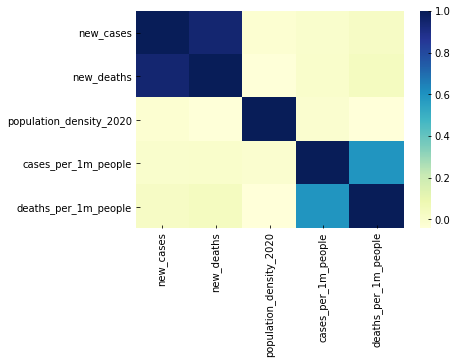

In [69]:
sns.heatmap(covid_all.corr(), cmap="YlGnBu")
plt.show()

# Questions

## 1. When the covid will stop being a pandemic?
## 2. Next month will there be a new epicenter?

<br>
<br>
in these two cases <br>

- we need define: 
    - how we'll consider a country as an epicenter
    - what's a pandemic? when we consider that there is no more pandemic?
    
- we'll work on predicting the number of cases in the future.